In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [73]:
data = pd.read_csv("nfl_plays_offense_personnel.csv")
plays23 = pd.read_csv("nfl_23_plays_offense_personnel.csv")
data.columns.tolist()

['posteam',
 'posteam_type',
 'side_of_field',
 'yardline_100',
 'quarter_seconds_remaining',
 'half_seconds_remaining',
 'qtr',
 'down',
 'time',
 'ydstogo',
 'play_type',
 'yards_gained',
 'pass_length',
 'pass_location',
 'run_location',
 'run_gap',
 'field_goal_result',
 'kick_distance',
 'posteam_timeouts_remaining',
 'defteam_timeouts_remaining',
 'posteam_score',
 'defteam_score',
 'score_differential',
 'interception',
 'safety',
 'fumble_lost',
 'touchdown',
 'field_goal_attempt',
 'punt_attempt',
 'offense_formation',
 'offense_personnel',
 'route',
 'o_personnel',
 'personnel_num']

In [74]:
data.dropna(subset=['down'], inplace=True)
data.dropna(subset=['play_type'], inplace=True)
data.dropna(subset=['score_differential'], inplace=True)
plays23.dropna(subset=['down'], inplace=True)
plays23.dropna(subset=['play_type'], inplace=True)
plays23.dropna(subset=['score_differential'], inplace=True)

In [75]:
data

,posteam,posteam_type,side_of_field,yardline_100,quarter_seconds_remaining,half_seconds_remaining,qtr,down,time,ydstogo,...,safety,fumble_lost,touchdown,field_goal_attempt,punt_attempt,offense_formation,offense_personnel,route,o_personnel,personnel_num
1,TEN,home,TEN,75,900,1800,1,1.0,15:00,10,...,0,0,0,0,0,SINGLEBACK,"1 RB, 2 TE, 2 WR",NaN,"1 RB, 2 TE, 2 WR",12.0
2,TEN,home,TEN,78,863,1763,1,2.0,14:23,13,...,0,0,0,0,0,SHOTGUN,"1 RB, 2 TE, 2 WR",ANGLE,"1 RB, 2 TE, 2 WR",12.0
3,TEN,home,TEN,75,822,1722,1,3.0,13:42,10,...,0,0,0,0,0,SHOTGUN,"1 RB, 1 TE, 3 WR",HITCH,"1 RB, 1 TE, 3 WR",11.0
4,TEN,home,TEN,75,819,1719,1,4.0,13:39,10,...,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN
5,ARI,away,ARI,61,807,1707,1,1.0,13:27,10,...,0,0,0,0,0,SHOTGUN,"1 RB, 2 TE, 2 WR",GO,"1 RB, 2 TE, 2 WR",12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130819,KC,home,SF,37,168,168,5,2.0,02:48,6,...,0,0,0,0,0,SHOTGUN,"1 RB, 1 TE, 3 WR",SCREEN,"1 RB, 1 TE, 3 WR",11.0
130820,KC,home,SF,32,127,127,5,3.0,02:07,1,...,0,0,0,0,0,SHOTGUN,"1 RB, 2 TE, 2 WR",NaN,"1 RB, 2 TE, 2 WR",12.0
130821,KC,home,SF,13,86,86,5,1.0,01:26,10,...,0,0,0,0,0,SHOTGUN,"1 RB, 3 TE, 1 WR",NaN,"1 RB, 3 TE, 1 WR",13.0
130822,KC,home,SF,10,50,50,5,2.0,00:50,7,...,0,0,0,0,0,SHOTGUN,"1 RB, 1 TE, 3 WR",SCREEN,"1 RB, 1 TE, 3 WR",11.0


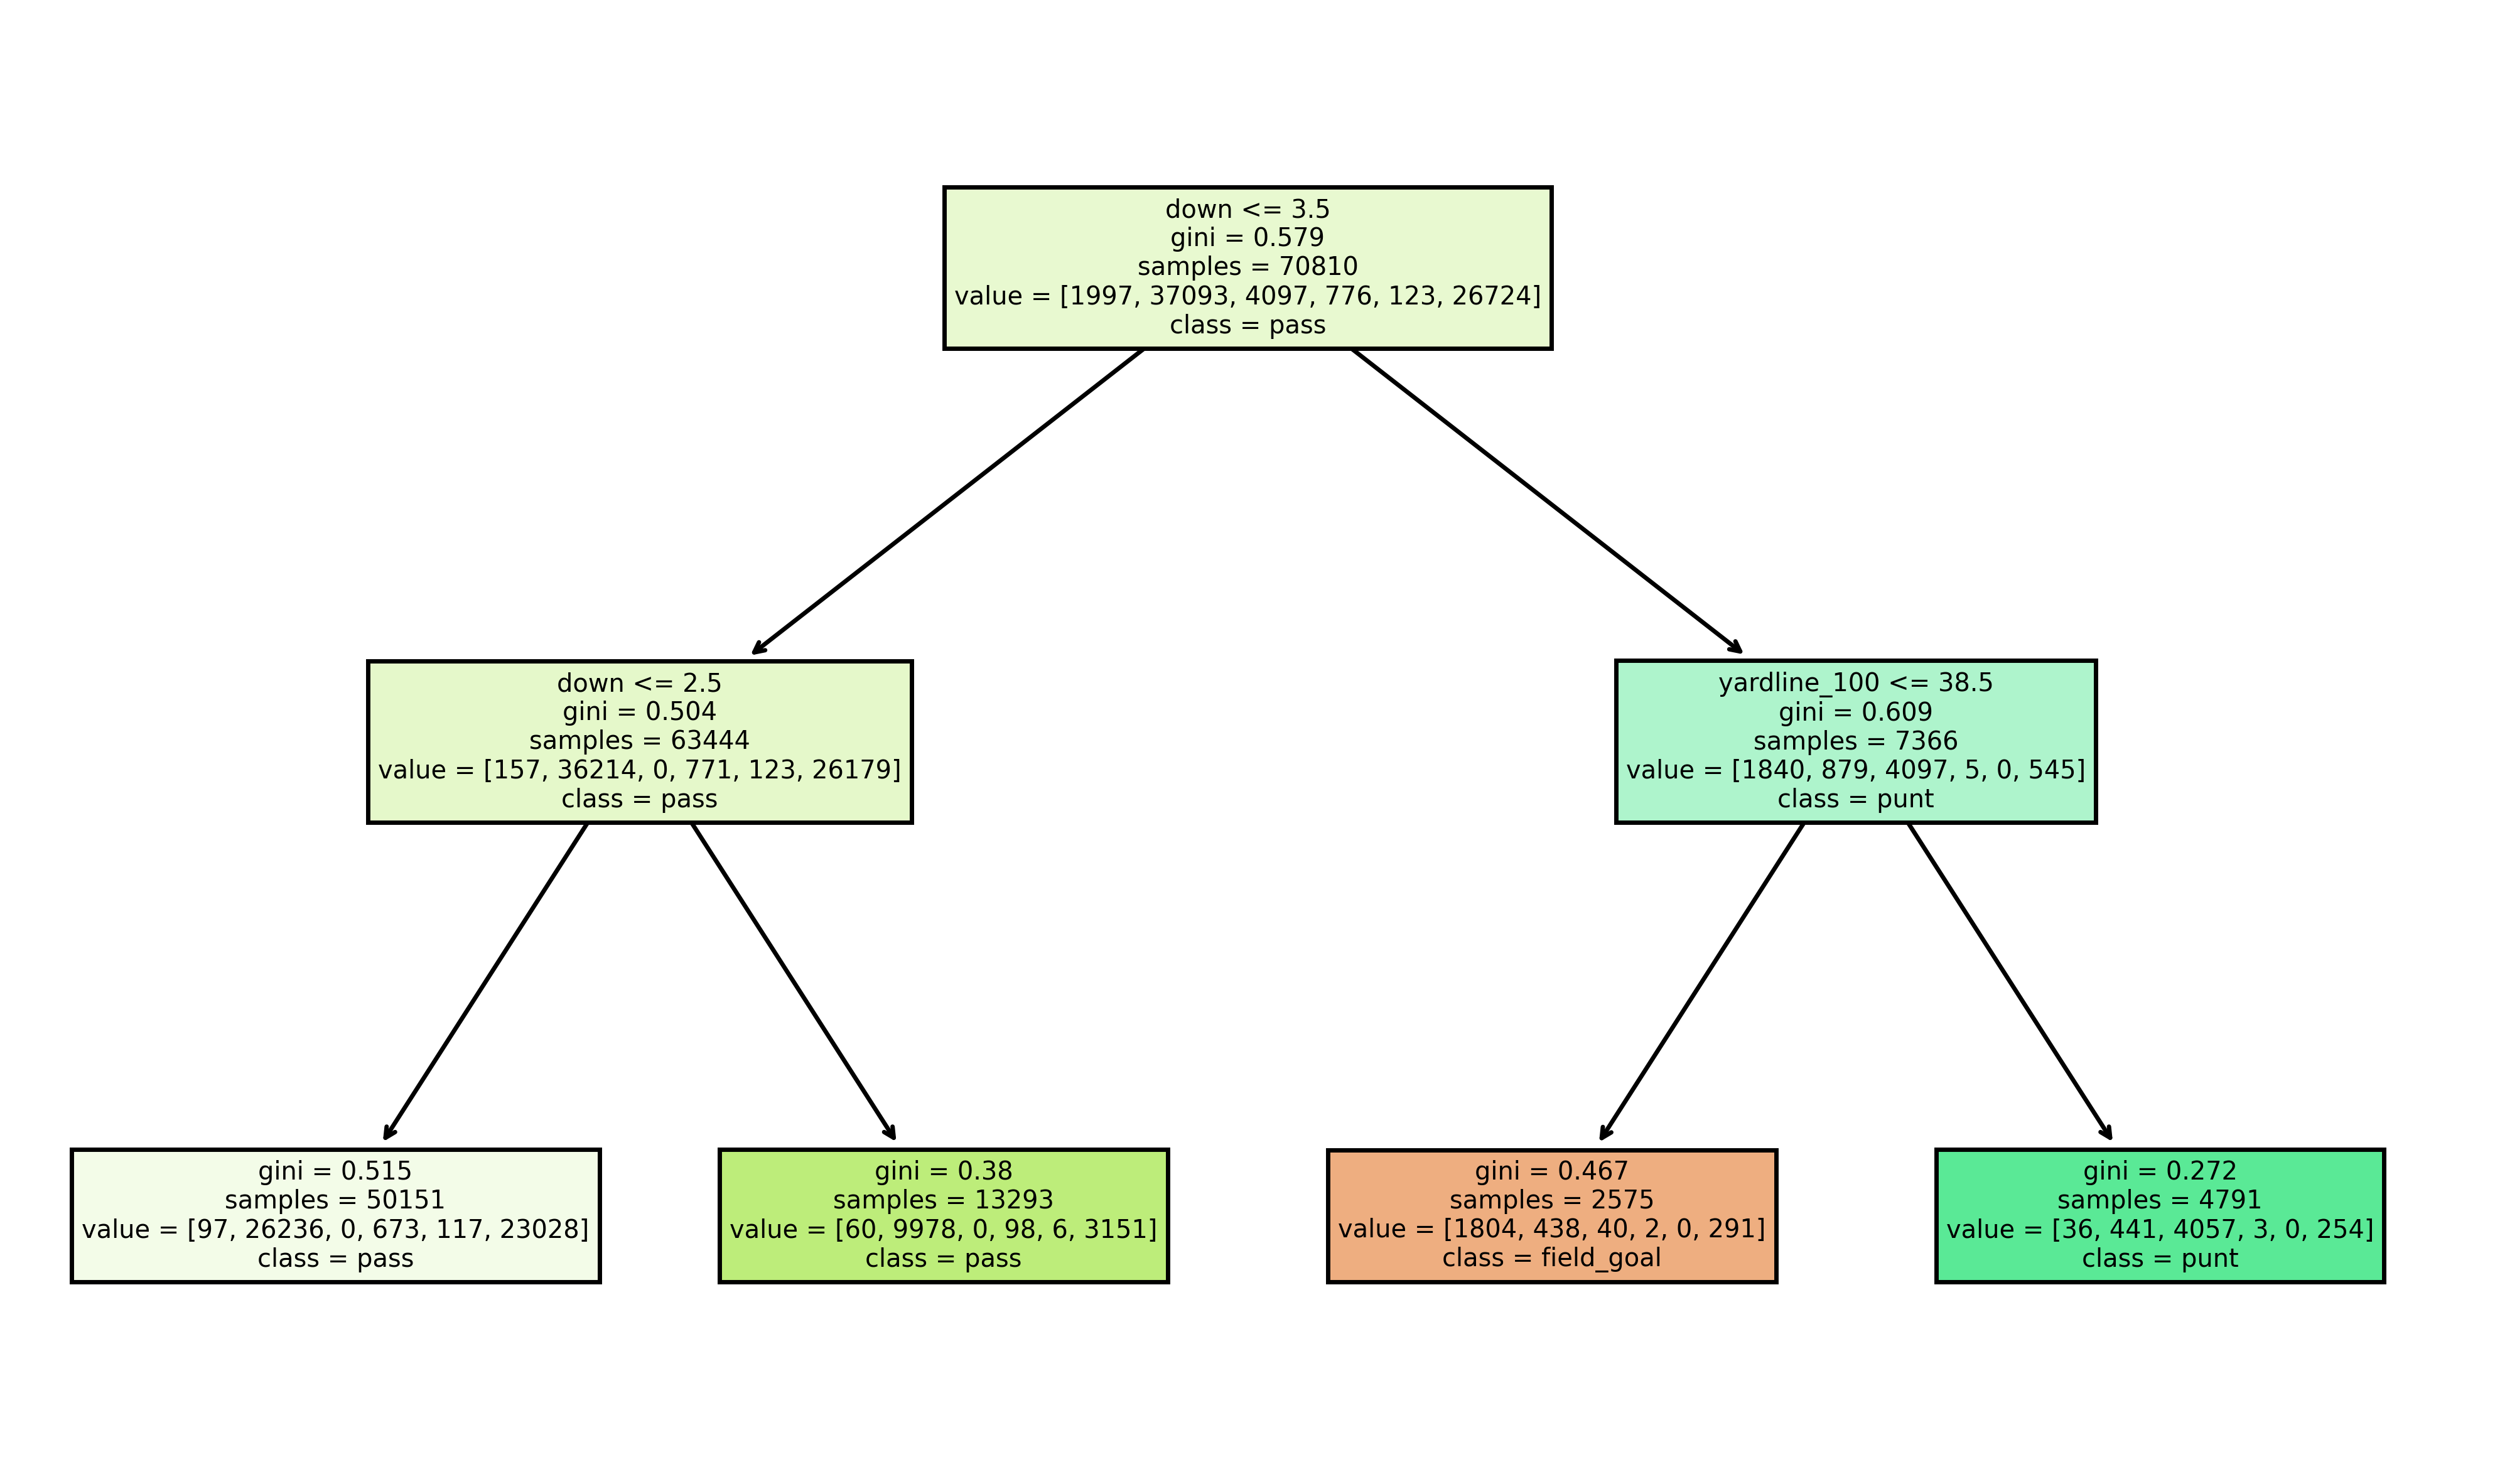

In [76]:
plays_predictors = plays23[['yardline_100', 
                        'down', 
                       'quarter_seconds_remaining', 
                        'qtr', 
                        'ydstogo']]
X = plays_predictors
y = plays23[['play_type']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create decision tree classifier
tree_clf_23 = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the classifier on the training data
tree_clf_23.fit(X_train, y_train)

# Plot decision tree
plt.figure(figsize=(10, 6), dpi=500)  # Adjust the figure size and DPI
plot_tree(tree_clf_23, filled=True, feature_names=X.columns, class_names=tree_clf_23.classes_)
plt.show()

In [77]:
data_predictors = data[['yardline_100', 
                        'down', 
                       'quarter_seconds_remaining', 
                        'qtr', 
                        'ydstogo']]
X = data_predictors
y = data[['play_type']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create decision tree classifier
tree_clf = DecisionTreeClassifier(max_depth=45, random_state=42)

# Train the classifier on the training data
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=45, random_state=42)

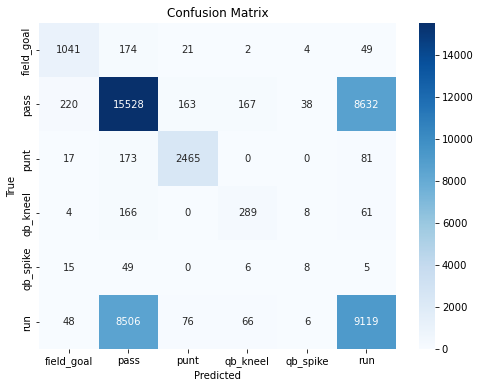

In [78]:
y_pred = tree_clf.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=tree_clf.classes_, yticklabels=tree_clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [79]:
true_positives = np.diag(conf_matrix)


total_instances = np.sum(conf_matrix, axis=1)

class_accuracy = true_positives / total_instances


overall_accuracy = np.sum(true_positives) / np.sum(conf_matrix)

class_names = ['field_goal', 'pass', 'punt', 'qb_kneel', 'qb_spike', 'run']
for i, acc in zip(class_names, class_accuracy):
    print(f'Class {i}: {acc*100:.2f}%\n')


print(f'Overall Accuracy: {overall_accuracy*100:.2f}%')

Class field_goal: 80.64%

Class pass: 62.74%

Class punt: 90.10%

Class qb_kneel: 54.73%

Class qb_spike: 9.64%

Class run: 51.17%

Overall Accuracy: 60.27%


In [83]:
importances = tree_clf.feature_importances_


feature_names = data_predictors.columns

# Print the feature importances
for i, importance in zip(feature_names, importances):
    print(f"Feature {i}: {importance}")

Feature yardline_100: 0.272897593240739
Feature down: 0.15835726338322756
Feature quarter_seconds_remaining: 0.4052112235671966
Feature qtr: 0.060631662291858464
Feature ydstogo: 0.10290225751697832


In [84]:
data_predictors = data[['yardline_100', 
                        'down', 
                       'quarter_seconds_remaining', 
                        'qtr', 
                        'ydstogo',
                        'score_differential',
                        'posteam_timeouts_remaining',
                        'defteam_timeouts_remaining']]
X = data_predictors
y = data[['play_type']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create decision tree classifier
tree_clf = DecisionTreeClassifier(max_depth=45, random_state=42)

# Train the classifier on the training data
tree_clf.fit(X_train, y_train)

# Plot decision tree
#plt.figure(figsize=(10, 6), dpi=500)  # Adjust the figure size and DPI
#plot_tree(tree_clf, filled=True, feature_names=X.columns, class_names=tree_clf.classes_)
#plt.show()

DecisionTreeClassifier(max_depth=45, random_state=42)

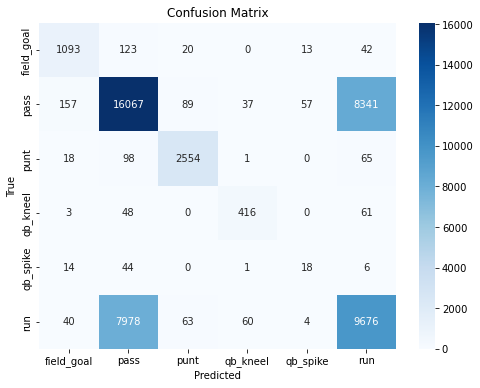

In [85]:

y_pred = tree_clf.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=tree_clf.classes_, yticklabels=tree_clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  field_goal       0.82      0.85      0.84      1291
        pass       0.66      0.65      0.65     24748
        punt       0.94      0.93      0.94      2736
    qb_kneel       0.81      0.79      0.80       528
    qb_spike       0.20      0.22      0.21        83
         run       0.53      0.54      0.54     17821

    accuracy                           0.63     47207
   macro avg       0.66      0.66      0.66     47207
weighted avg       0.63      0.63      0.63     47207



In [87]:
importances = tree_clf.feature_importances_


feature_names = data_predictors.columns

# Print the feature importances
for i, importance in zip(feature_names,importances):
    print(f"Feature {i}: {importance}")

Feature yardline_100: 0.22550980262201636
Feature down: 0.15414177966920248
Feature quarter_seconds_remaining: 0.285465723120569
Feature qtr: 0.052175682148374404
Feature ydstogo: 0.08925634513969166
Feature score_differential: 0.12977008305093207
Feature posteam_timeouts_remaining: 0.02871700249452019
Feature defteam_timeouts_remaining: 0.034963581754693836


In [88]:
true_positives = np.diag(conf_matrix)


total_instances = np.sum(conf_matrix, axis=1)

class_accuracy = true_positives / total_instances


overall_accuracy = np.sum(true_positives) / np.sum(conf_matrix)

class_names = ['field_goal', 'pass', 'punt', 'qb_kneel', 'qb_spike', 'run']
for i, acc in zip(class_names, class_accuracy):
    print(f'Class {i}: {acc*100:.2f}%\n')


print(f'Overall Accuracy: {overall_accuracy*100:.2f}%')

Class field_goal: 84.66%

Class pass: 64.92%

Class punt: 93.35%

Class qb_kneel: 78.79%

Class qb_spike: 21.69%

Class run: 54.30%

Overall Accuracy: 63.18%


In [89]:
kc= data[data['posteam'] == 'KC']

kc_predictors = kc[['yardline_100', 
                        'down', 
                        'quarter_seconds_remaining', 
                        'qtr', 
                        'ydstogo',
                        'score_differential',
                        'posteam_timeouts_remaining',
                        'defteam_timeouts_remaining']]
X_kc = kc_predictors
y_kc = kc[['play_type']]

X_train_kc, X_test_kc, y_train_kc, y_test_kc = train_test_split(X_kc, y_kc, test_size=0.4, random_state=42)

# Create decision tree classifier
tree_clf_kc = DecisionTreeClassifier(max_depth=45, random_state=42)

# Train the classifier on the training data
tree_clf_kc.fit(X_train_kc, y_train_kc)

DecisionTreeClassifier(max_depth=45, random_state=42)

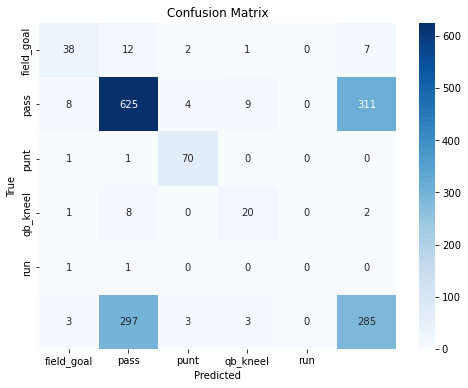

In [90]:
y_pred_kc = tree_clf_kc.predict(X_test_kc)


conf_matrix_kc = confusion_matrix(y_test_kc, y_pred_kc)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_kc, annot=True, fmt="d", cmap="Blues", xticklabels=tree_clf_kc.classes_, yticklabels=tree_clf_kc.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [91]:
true_positives = np.diag(conf_matrix_kc)


total_instances = np.sum(conf_matrix_kc, axis=1)


class_accuracy = true_positives / total_instances


overall_accuracy = np.sum(true_positives) / np.sum(conf_matrix_kc)

class_names = ['field_goal', 'pass', 'punt', 'qb_kneel', 'qb_spike', 'run']

for i, acc in zip(class_names, class_accuracy):
    print(f'Class {i}: {acc*100:.2f}%')


print(f'Overall Accuracy: {overall_accuracy*100:.2f}%')


Class field_goal: 63.33%
Class pass: 65.31%
Class punt: 97.22%
Class qb_kneel: 64.52%
Class qb_spike: 0.00%
Class run: 48.22%
Overall Accuracy: 60.60%


In [92]:
teams = np.unique(data['posteam'])

print(teams)
predictors = ['yardline_100', 
                            'down', 
                            'quarter_seconds_remaining', 
                            'qtr', 
                            'ydstogo',
                            'score_differential',
                            'posteam_timeouts_remaining',
                            'defteam_timeouts_remaining']

['ARI' 'ATL' 'BAL' 'BUF' 'CAR' 'CHI' 'CIN' 'CLE' 'DAL' 'DEN' 'DET' 'GB'
 'HOU' 'IND' 'JAX' 'KC' 'LA' 'LAC' 'LV' 'MIA' 'MIN' 'NE' 'NO' 'NYG' 'NYJ'
 'PHI' 'PIT' 'SEA' 'SF' 'TB' 'TEN' 'WAS']


In [93]:
def plays_by_team(team, predictors):
    #Get Team Data
    team_data = data[data['posteam'] == team]
    #X is the predictors we passed in and y is what we want to predict
    X_team = team_data[predictors]
    y_team = team_data[['play_type']]

    #Want to create a 40/60 train test split
    X_train_team, X_test_team, y_train_team, y_test_team = train_test_split(X_team, y_team, test_size=0.4, random_state=42)

    #make the tree
    tree_clf_team = DecisionTreeClassifier(max_depth=45, random_state=42)

    #train the tree
    tree_clf_team.fit(X_train_team, y_train_team)
    
    #test our tree
    y_pred_team = tree_clf_team.predict(X_test_team)

    #create a confusion matrix with our test data
    conf_matrix_team = confusion_matrix(y_test_team, y_pred_team)
    
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_team, annot=True, fmt="d", cmap="Blues", xticklabels=tree_clf_team.classes_, yticklabels=tree_clf_team.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {team}')
    true_positives = np.diag(conf_matrix_team)


    total_instances = np.sum(conf_matrix_team, axis=1)


    class_accuracy = true_positives / total_instances


    overall_accuracy = np.sum(true_positives) / np.sum(conf_matrix_team)

    class_names = ['field_goal', 'pass', 'punt', 'qb_kneel', 'qb_spike', 'run']
    
    accuracy_data = f'Accuracy Data for: {team}\n'
    for i, acc in zip(class_names, class_accuracy):
        accuracy_data += f'Class {i}: {acc*100:.2f}%\n'
        
    Overall = f'Overall Accuracy: {overall_accuracy*100:.2f}%\n'


    return conf_matrix_team, accuracy_data, Overall


Accuracy Data for: LAC
Class field_goal: 64.10%
Class pass: 70.25%
Class punt: 90.36%
Class qb_kneel: 46.67%
Class qb_spike: 0.00%
Class run: 48.30%

Overall Accuracy: 63.58%



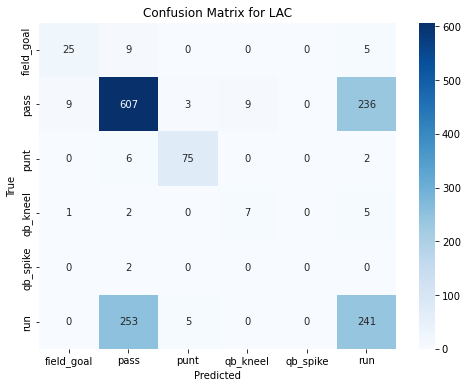

In [130]:
conf_matrix_kc, accuracy_data_kc, overall_kc = plays_by_team("LAC", predictors)
print(accuracy_data_kc)
print(overall_kc)

C:\Users\camdi\AppData\Local\Temp/ipykernel_43632/2758606775.py:35: RuntimeWarning: invalid value encountered in divide
  class_accuracy = true_positives / total_instances
C:\Users\camdi\AppData\Local\Temp/ipykernel_43632/2758606775.py:35: RuntimeWarning: invalid value encountered in divide
  class_accuracy = true_positives / total_instances
C:\Users\camdi\AppData\Local\Temp/ipykernel_43632/2758606775.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 6))


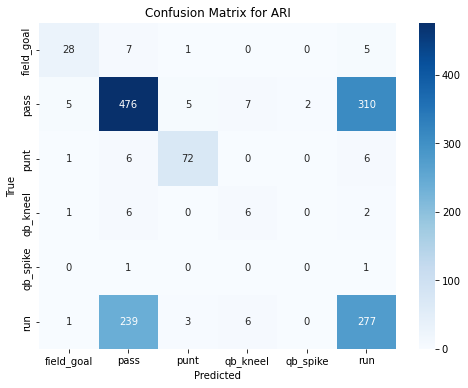

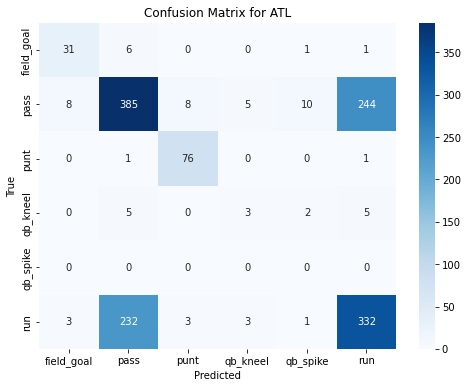

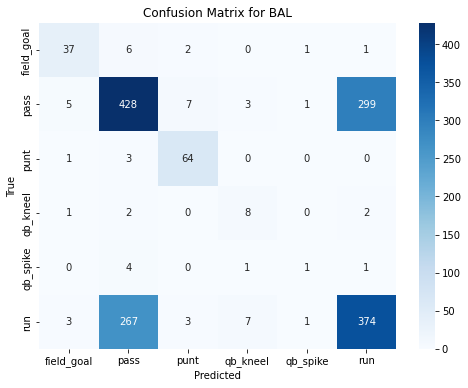

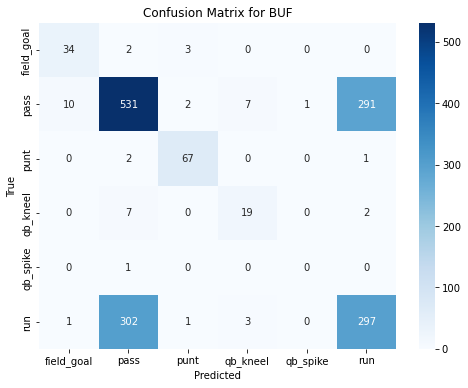

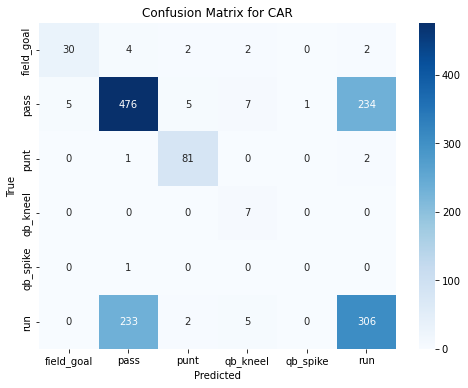

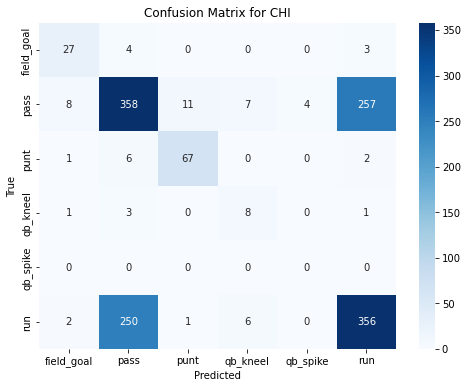

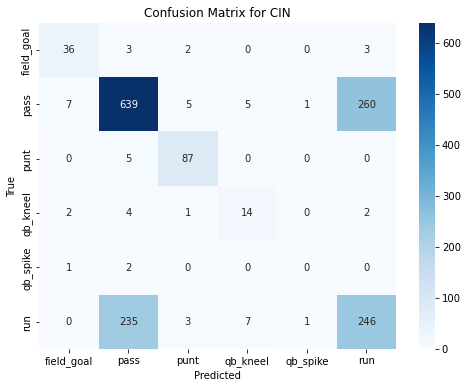

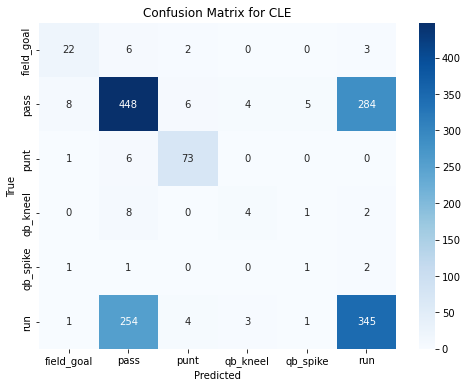

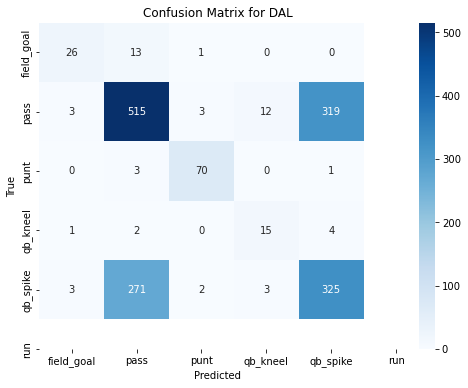

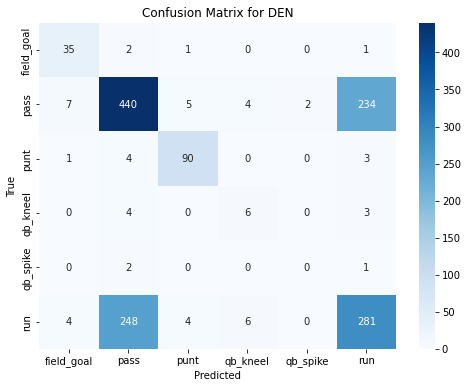

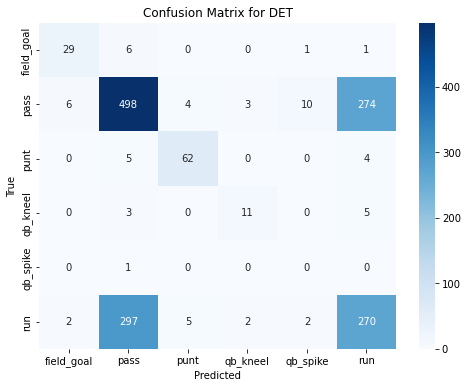

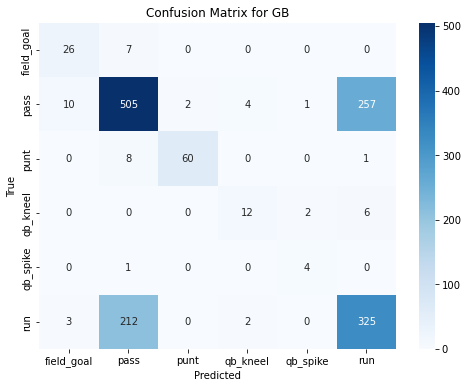

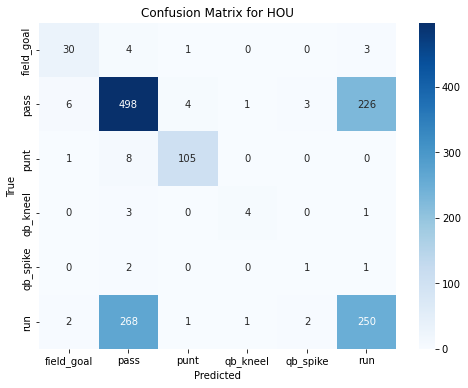

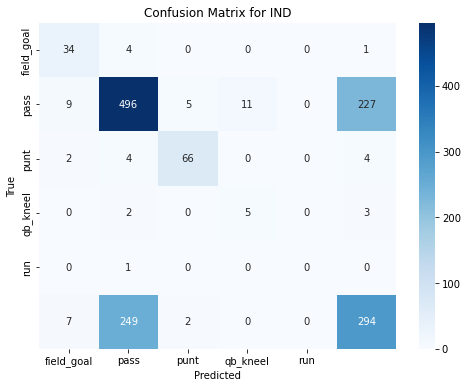

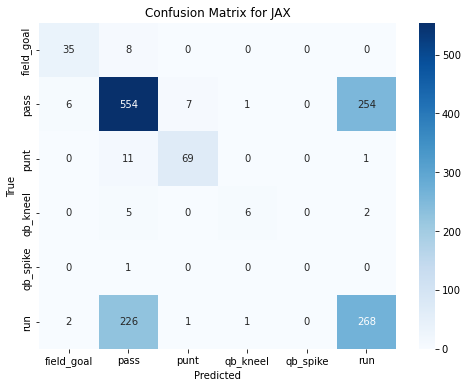

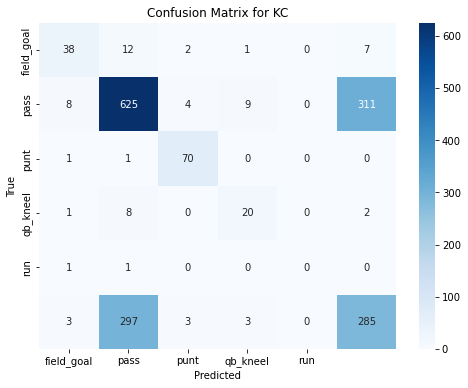

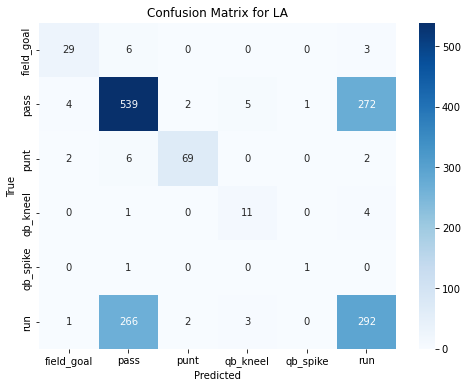

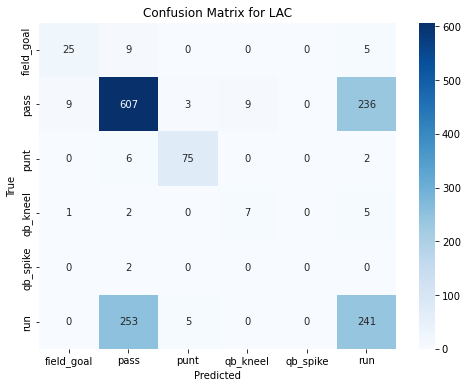

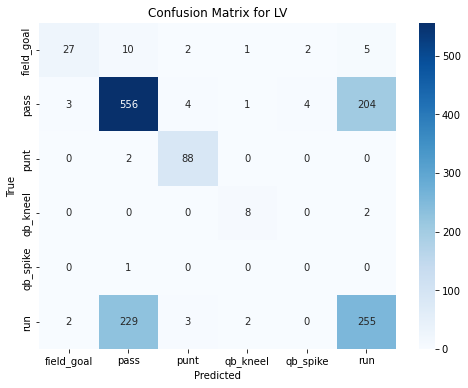

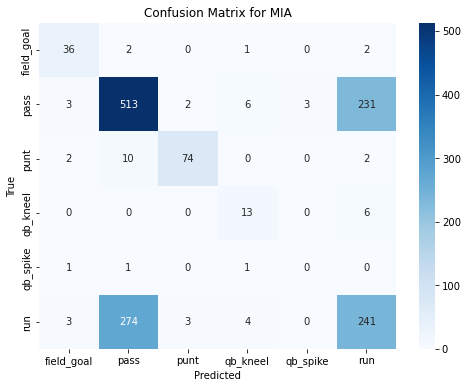

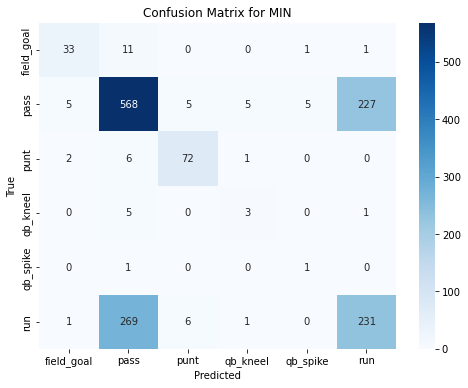

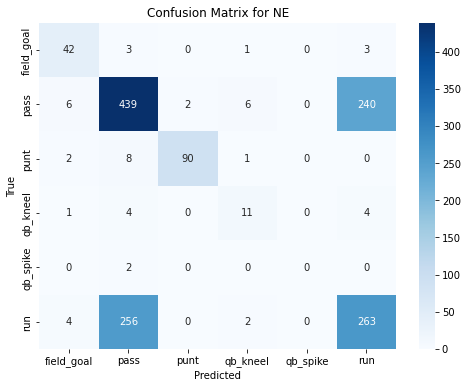

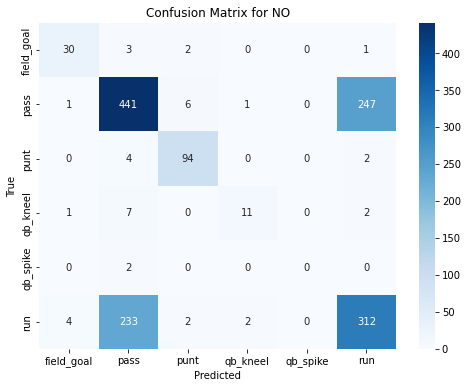

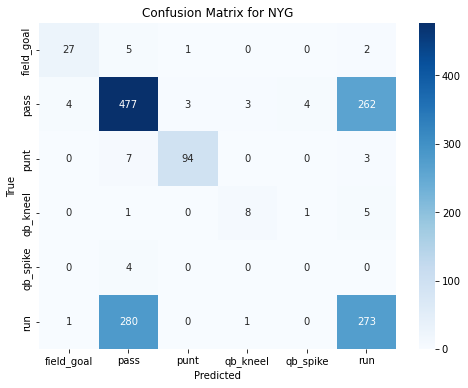

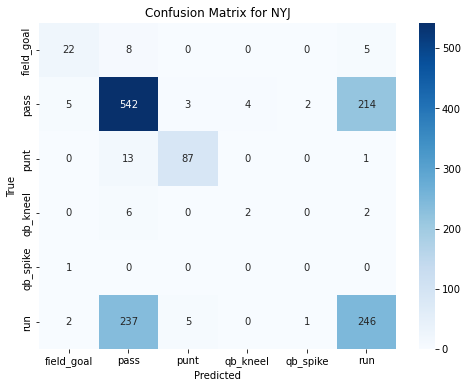

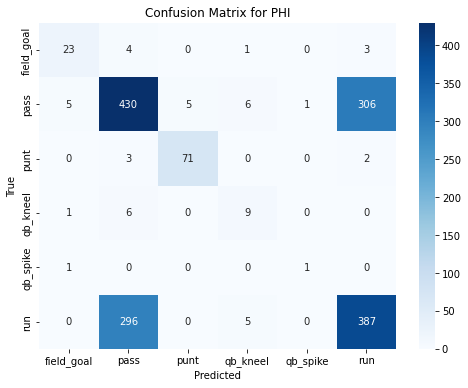

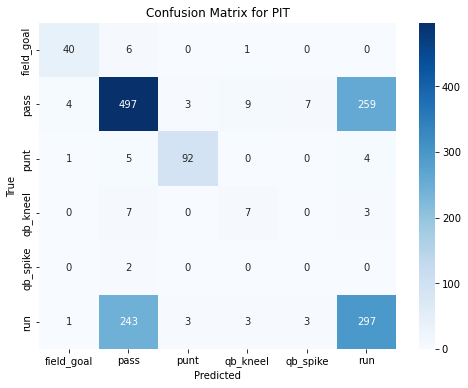

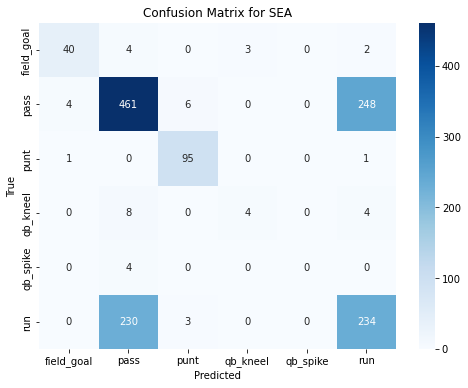

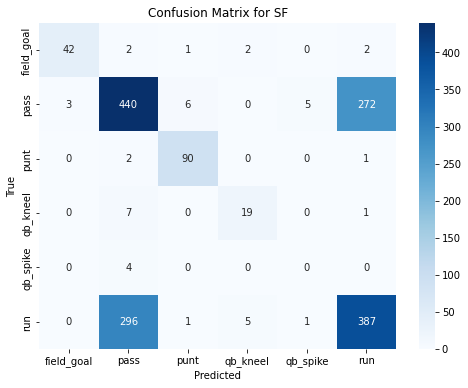

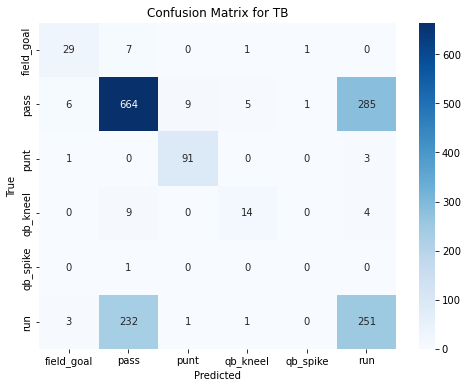

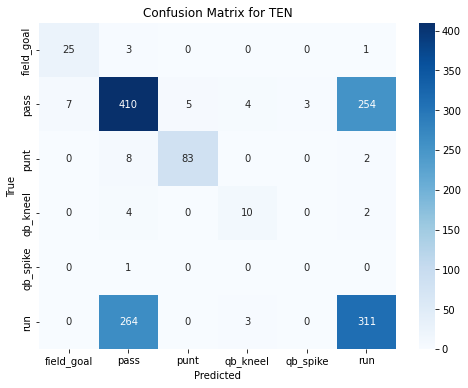

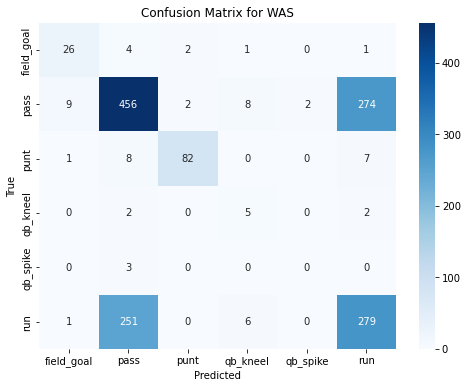

In [97]:
team_results = {}
for i in teams:
    conf_matrix_team, accuracy_data_team, overall_team = plays_by_team(i, predictors)
    team_results[i] = {
        'conf_matrix': conf_matrix_team,
        'accuracy_data': accuracy_data_team,
        'overall': overall_team
    }

In [100]:
team_name = 'DEN'  
print(team_results[team_name]['accuracy_data'])

Accuracy Data for: DEN
Class field_goal: 89.74%
Class pass: 63.58%
Class punt: 91.84%
Class qb_kneel: 46.15%
Class qb_spike: 0.00%
Class run: 51.75%



In [99]:
for i in teams:
    print(i + ' ' +team_results[i]['overall'])

ARI Overall Accuracy: 58.28%

ATL Overall Accuracy: 60.54%

BAL Overall Accuracy: 59.49%

BUF Overall Accuracy: 59.85%

CAR Overall Accuracy: 64.01%

CHI Overall Accuracy: 59.00%

CIN Overall Accuracy: 65.05%

CLE Overall Accuracy: 59.69%

DAL Overall Accuracy: 59.74%

DEN Overall Accuracy: 61.38%

DET Overall Accuracy: 57.96%

GB Overall Accuracy: 64.36%

HOU Overall Accuracy: 62.27%

IND Overall Accuracy: 62.76%

JAX Overall Accuracy: 63.92%

KC Overall Accuracy: 60.60%

LA Overall Accuracy: 61.83%

LAC Overall Accuracy: 63.58%

LV Overall Accuracy: 66.19%

MIA Overall Accuracy: 61.16%

MIN Overall Accuracy: 62.15%

NE Overall Accuracy: 60.79%

NO Overall Accuracy: 63.07%

NYG Overall Accuracy: 59.96%

NYJ Overall Accuracy: 63.85%

PHI Overall Accuracy: 58.81%

PIT Overall Accuracy: 62.32%

SEA Overall Accuracy: 61.69%

SF Overall Accuracy: 61.55%

TB Overall Accuracy: 64.79%

TEN Overall Accuracy: 59.93%

WAS Overall Accuracy: 59.22%



NEXT MODELS TO TRY:
 *Random Forest
 *KNN
 *SVM
 *GBM

## Random Forest

In [127]:
data_predictors = data[['yardline_100', 
                        'down', 
                       'quarter_seconds_remaining', 
                        'qtr', 
                        'ydstogo',
                        'score_differential',
                        'posteam_timeouts_remaining',
                        'defteam_timeouts_remaining']]
X = data_predictors
y = data[['play_type']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

C:\Users\camdi\AppData\Local\Temp/ipykernel_43632/1311259862.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


RandomForestClassifier(n_estimators=1000, random_state=42)

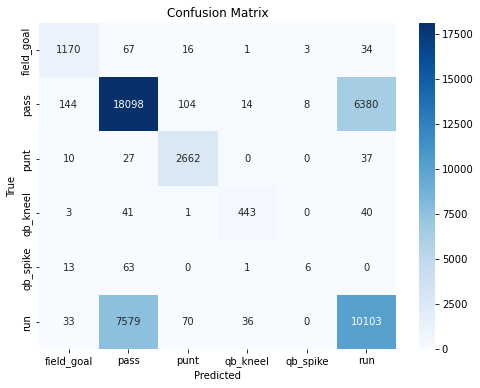

In [128]:
y_pred = rf_classifier.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [129]:
true_positives = np.diag(conf_matrix)


total_instances = np.sum(conf_matrix, axis=1)

class_accuracy = true_positives / total_instances


overall_accuracy = np.sum(true_positives) / np.sum(conf_matrix)


class_names = ['field_goal', 'pass', 'punt', 'qb_kneel', 'qb_spike', 'run']
for i, acc in zip(class_names, class_accuracy):
    print(f'Class {i}: {acc*100:.2f}%\n')

print(f'Overall Accuracy: {overall_accuracy*100:.2f}%')

Class field_goal: 90.63%

Class pass: 73.13%

Class punt: 97.30%

Class qb_kneel: 83.90%

Class qb_spike: 7.23%

Class run: 56.69%

Overall Accuracy: 68.81%


In [111]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  field_goal       0.85      0.91      0.88      1291
        pass       0.70      0.73      0.72     24748
        punt       0.93      0.97      0.95      2736
    qb_kneel       0.90      0.83      0.86       528
    qb_spike       0.38      0.07      0.12        83
         run       0.61      0.56      0.58     17821

    accuracy                           0.69     47207
   macro avg       0.73      0.68      0.69     47207
weighted avg       0.68      0.69      0.68     47207



## KNN

In [134]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = knn_classifier.predict(X_test)

C:\Users\camdi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


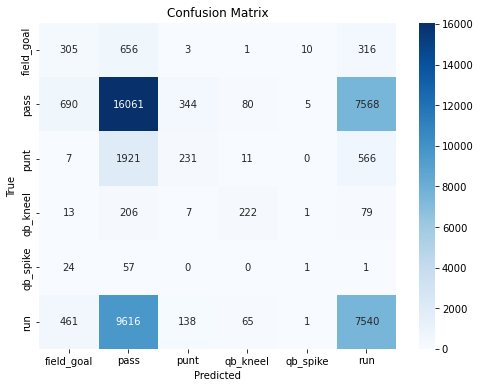

In [135]:
conf_matrix = confusion_matrix(y_test, predictions)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [136]:
true_positives = np.diag(conf_matrix)


total_instances = np.sum(conf_matrix, axis=1)

class_accuracy = true_positives / total_instances


overall_accuracy = np.sum(true_positives) / np.sum(conf_matrix)


class_names = ['field_goal', 'pass', 'punt', 'qb_kneel', 'qb_spike', 'run']
for i, acc in zip(class_names, class_accuracy):
    print(f'Class {i}: {acc*100:.2f}%\n')

print(f'Overall Accuracy: {overall_accuracy*100:.2f}%')

Class field_goal: 23.63%

Class pass: 64.90%

Class punt: 8.44%

Class qb_kneel: 42.05%

Class qb_spike: 1.20%

Class run: 42.31%

Overall Accuracy: 51.60%
